## Evaluación 1

### Based on the information provided, the investment strategy area wishes to develop a model that gives weekly purchase signals that result in high levels of effectiveness.

1. Evaluate the classification model that gives the best buying signals to investors in the ETF whose price you find in the database. Apply Gridsearch with cross validation for each model in just one function. Below you will find a pre-started function for your reference that you can complement and modify as you consider needed. 
    
    a. Analyze the ranking behavior of the models included in the lists provided.

    b. In the evaluation include testing various parameters such as changing the number of weeks of lag in returns, testing          the use of prices instead of returns and changing any of the model parameters. For example, number of neighbors in KNN,        calculation of the number of levels in a classification tree, number of trees in a random forest, among others. Among          all tests you must evaluate at least 6 combinations of parameters/models. An example of combinations would be:

        i.      KNN, 5 neighbors, using prices with 10 week timeframe
        

2. If your goal is to make investment decisions for next week, choose a model and justify why. Ultimately, the model you should choose is the one with the highest percentage of success in making investment decisions. Remember that if the accuracy of classification 1 is 50% it means that half of the buy signals are false and half are correct. If the recall is 50%, it means that the model will identify half of the good purchasing opportunities and will make us lose the other half. Remember to play with the time window and threshold.

       a. Analyze and justify your choice
       b. This exercise was done with an XLF asset, a financial stock ETF. If we change the data set to the XLK, of technology           stocks, would the model still have the same good results? Convert data with XLK to x_test and y_test test data.

### Deliver this lab via e-mail in PDF or HTML format.
Make sure the delivered file can be opened fine. In the case of HTML files, try opening it in a browser.

## Some helpful code is provided bellow. It can serve to load data and organice functions.

In [1]:
#!pip install yfinance
import yfinance as yf
precios = yf.Ticker('XLI').history(period="10y", interval='1wk')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [9]:
precios = precios.Close

In [10]:
precios.head(10)

Date
2013-11-25    41.729191
2013-12-02    41.679508
2013-12-09    41.207561
2013-12-16    42.441219
2013-12-20          NaN
2013-12-23    43.273209
2013-12-30    42.998577
2014-01-06    43.214958
2014-01-13    43.123417
2014-01-20    41.450752
Name: Close, dtype: float64

In [11]:
retornos = np.log(precios).diff()[1:].dropna()
mat_retornos = retornos.values

In [20]:
mat_retornos.shape

(496,)

## This is an example of how a list of models can be put together to run secuentially.

In [ ]:
names = ["Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost"]

classifiers = [KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

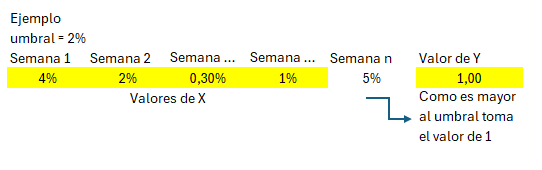

### Above you have an illustration of how the data preparation is made. It's all about a moving window where the last week gives you the result of the investment decision based on the data from the previous n weeks. The result is converted into 3 classes.

## This is a function to run the model, adapt the function so that it evaluates all models included in the list above. Make sure you import the libraries corresponding to all models

In [18]:
def prueba_modelo(per, umbral, h):        
        
        # ventana de tiempo - Columnas
        muestras = len(mat_retornos) - per

        variables = np.zeros((1,per))
        l = len(mat_retornos)

        for x in range(muestras):
            variables = np.concatenate((variables, mat_retornos[l-per-x: l-x].reshape((1,per))))

        variables = variables[1:]

        X = variables[:,:-1]
        Y = variables[:,-1]*100

        # los retornos porcentuales en una semana determinada los vamos a clasificar como "bajo, neutral o alto"
        # esto dependiendo del umbral que inicialmente vamos a establecerlo en 2%
            
        neutral = [not x for x in ((Y>umbral)|(Y<-umbral))]
        
        # Aquí vamos a modificar Y para clasificar los retornos -1 = bajo, 0 = neutral y 1 = alto
        # La idea es que el modelo logre clasificar efectivamente los retornos altos.
        
        Y[Y>umbral] = 1
        Y[Y<-umbral] = -1
        Y[neutral] = 0

        i_entrenamiento = int(len(variables)*0.7) #la fila hasta donde va el entrenamiento y donde comienza el conjunto de prueba
        
        # fíjese que el entrenamiento se hará utilizando datos hasta una fecha X, de ahí en adelante, probaremos el modelo
        # hacia adelante en el tiempo con lo que será el conjunto de prueba
        
        x_train = X[:i_entrenamiento, :]
        x_test =  X[i_entrenamiento:, :]
        y_train = Y[:i_entrenamiento]
        y_test =  Y[i_entrenamiento:]

        modelo = SVC(C=1, kernel='rbf', gamma=1).fit(x_train, y_train)

        pred = modelo.predict(x_test)
    
        return pred

In [6]:
n_columnas = [5, 10, 15, 20, 25, 30]
umbral = [1,2,3,4]